# The standard deb model

The standard DEB model, in the energy formulation, contains four dynamic state variables: reserve energy $E$, structure volume $V$, maturity energy $E_M$ and reproduction buffer energy $E_R$:

\begin{eqnarray}
    \frac{dE}{dt} &=& \dot{p}_A - \dot{p}_C\\
    \frac{dV}{dt} &=& \frac{\dot{p}_G}{[E_G]}\\
    \frac{dE_H}{dt} &=& \dot{p}_R (1 - H(E_H - E^p_H))\\
    \frac{dE_R}{dt} &=& \dot{p}_R H(E_H - E^p_H)
\end{eqnarray}

In this coupled set of ODEs, four fluxes appear:

\begin{eqnarray}
    \dot{p}_A &=& f(X)\{\dot{p}_{Am}\}V^{2/3}\\
    \dot{p}_C &=& E \left( \frac{[E_G]\dot{v}V^{2/3} + \dot{p}_S}{\kappa E + [E_G]V} \right)\\
    \dot{p}_G &=& \kappa\dot{p}_C - \dot{p}_S\\
    \dot{p}_R &=& (1-\kappa)\dot{p}_C - \dot{p}_J\\
\end{eqnarray}

Here, two additional loss fluxes appear, somatic maintenance $\dot{p}_S$ and maturity maintenance $\dot{p}_J$:

\begin{eqnarray}
    \dot{p}_S &=& [\dot{p}_M]V - \{\dot{p}_T\}V^{2/3}\\
    \dot{p}_J &=& \dot{k}_JE_H
\end{eqnarray}

In [1]:
%matplotlib inline

#Import packages we need
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import deb modules
import deb
import deb_compound_pars
import deb_aux

#Configure plotting
sns.set_context('notebook')
sns.set_style('white')

## The 12 primary parameters
Also include temperature parameters here for now

In [2]:
deb.get_deb_params_pandas()

,Min,Max,Value,Dimension,Units,Description
Fm,2.220446e-16,NaN,6.500000,l L**-2 t**-1,,Specific searching rate
kappaX,2.220446e-16,1.0,0.800000,-,,Assimilation efficiency
pAm,2.220446e-16,NaN,530.000000,e L**-2 t**-1,,max specific assimilation rate
v,2.220446e-16,NaN,0.020000,L t**-1,cm/d,Energy conductance
kappa,2.220446e-16,1.0,0.800000,-,,Allocation fraction to soma
kappaR,2.220446e-16,1.0,0.950000,-,,Reproduction efficiency
pM,2.220446e-16,NaN,18.000000,e L**-3 t**-1,J/d/cm**3,Volume-specific somatic maintenance cost
pT,0.000000e+00,NaN,0.000000,e L**-1 t**-1,,Surface-specific somatic maintenance cost
kJ,2.220446e-16,NaN,0.002000,t**-1,,Maturity maintenance rate coefficient
EG,2.220446e-16,NaN,4184.000000,e L**-3,,Specific cost for structure


## Forward solve test
Solve the standard DEB model equations (four state variables)

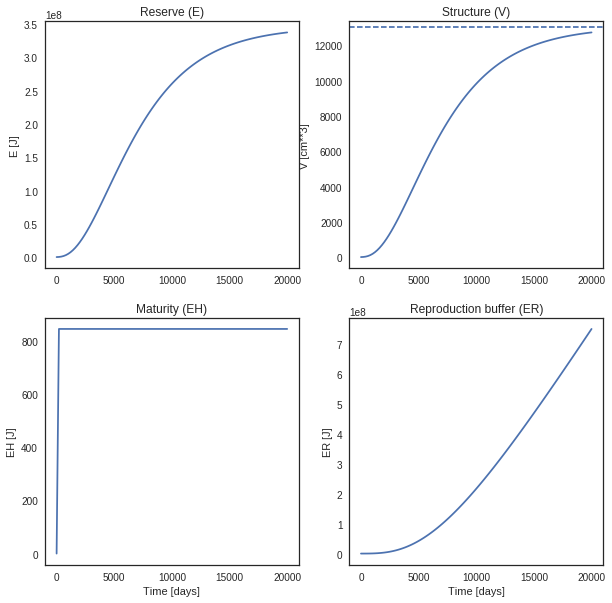

In [3]:
#Instantiate DEB model with constant food level (must be a function though)
f = lambda t: 1.0
dm = deb.DEBStandard({'f': f})

#Integrate the DEB equations, 20000 days 
y0 = [1000, 1, 0, 0]               # Initial state
t = np.linspace(0, 20000, 100)     # Time points
dm.predict(y0, t)                  # Predict

#Plot the state variable dynamics. Dashed line indicated implied maximum structural length.
fig = dm.plot_state()

## Real-world predictions with auxillary data and equations

Organism physical length [cm]

\begin{equation}
    L_w = \frac{L}{\delta_M} = \frac{\sqrt[3]{V}}{\delta_M}
\end{equation}

Organism total (dry) weight [g] is the sum of reserve, structure (and reproduction buffer) weights:

\begin{equation}
    W_W = w_VM_V + w_EM_E
\end{equation}

Organism physical volume

\begin{equation}
    V_w = V + (E + E_R)\frac{w_E}{d_E\bar{\mu}_E}
\end{equation}


### Supporting parameter relationships
See pps. 81 - 83 i DEB3.

Structural mass [mol]:

\begin{equation}
    M_V = [M_V]V = \frac{d_V}{w_V}V
\end{equation}

Reserve mass [mol]:

\begin{equation}
    M_E = \frac{E}{\bar{\mu}_E}
\end{equation}

Number of C-atoms per unit of structural volume [mol/cm$^3$]

\begin{equation}
    [M_V] = \frac{d_V}{w_V}
\end{equation}

#### Food function
Functional (food) response:

\begin{equation}
    f(X) = \frac{X}{K+X}
\end{equation}

Half saturation coefficient

\begin{equation}
    K = \frac{\{\dot{J}_{XAm}\}}{\{\dot{F}_m \}} = \frac{\{\dot{p}_{Am} \}}{\kappa_X\{\dot{F}_m \}\bar{\mu}_X}
\end{equation}



### Parameter values that must be specified
These equations requires the specification of three scalar parameters: 

| Description | Unit | Symbol | Typical value |
|----------------------------------------|:-------:|:-------------:|:-------------------:|
| Specific chemical potential of reserve | J/mol   | $\bar{\mu}_E$ | 550 000 (addchem.m) |
| Specific chemical potential of food    | J/mol   | $\bar{\mu}_X$ | 525 000 (addchem.m) |
| C-molar weight of water-free structure | g/mol   | $w_V$         | 24.6 (DEB3 ex)      |
| C-molar weight of water-free reserve   | g/mol   | $w_E$         | 23.0 (get_pars2.m)  |
| Specific density of dry structure      | g/cm$^3$| $d_V$         | 0.1                 |
| Specific density of reserve            | g/cm$^3$| $d_V$         | dV (addchem.m)      |
| Shape factor                           | -       | $\delta_M$    | 0.9 (made up)       |

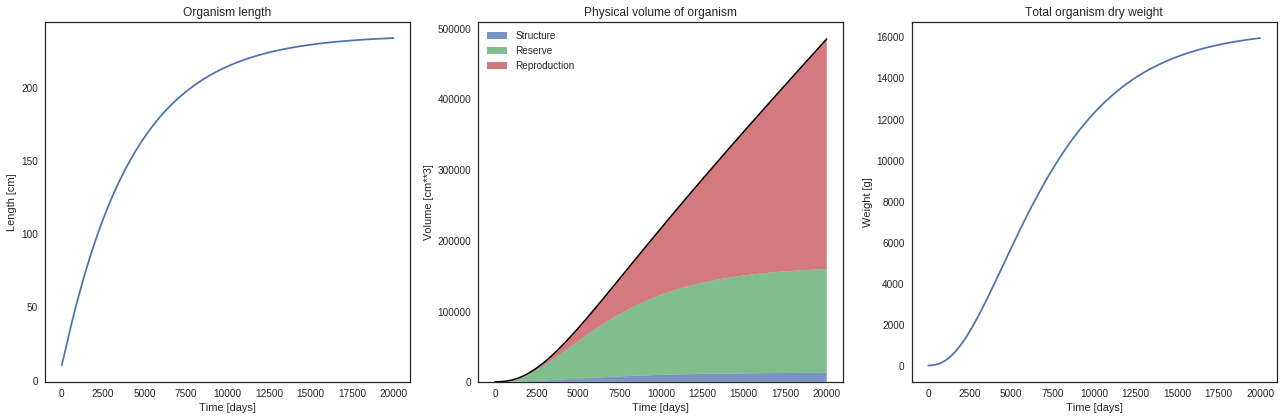

In [4]:
aux = deb_aux.AuxPars(dm)
fig = aux.plot_observables()
plt.tight_layout()

## Implied compound parameter

In [5]:
deb_compound_pars.calculate_compound_pars(dm.params)

,Min,Max,Value,Dimension,Unit,Description
Em,0.0,NaN,26500.000000,e L**-3,J/m,Max reserve density
g,0.0,NaN,0.197358,-,-,Energy investment ration
Lm,0.0,NaN,23.555556,l,m,Maximum structural length
kM,0.0,NaN,0.004302,t**-1,1/d,Somatic maintenance rate
kappaG,0.0,NaN,0.800000,-,-,Fraction of growth energy fixed in structure


# Testing food functions

/home/raymondne/anaconda3/envs/epytox/lib/python3.6/site-packages/scipy/integrate/_ode.py:1213: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  'Unexpected istate=%s' % istate))


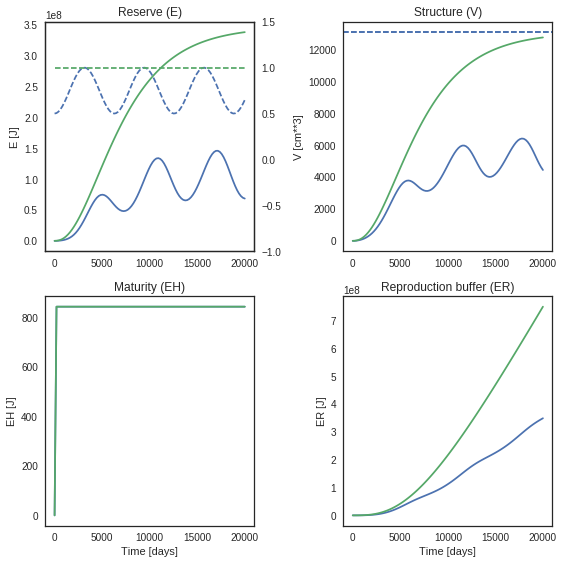

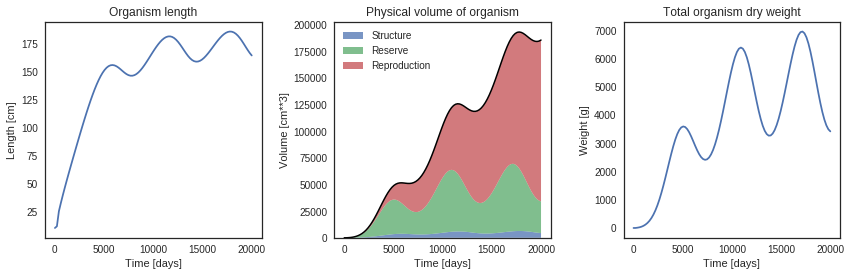

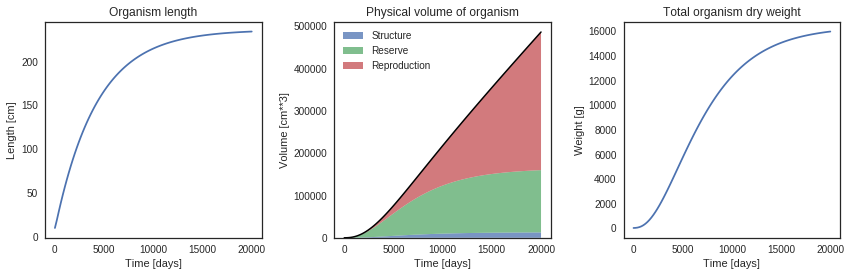

In [6]:
#Periodic food function
flist = [lambda t: 1/2*(1+np.sin(t/2000.)**2),
         lambda t: 0*t + 1.0]

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.flatten()
ax2 = ax[0].twinx()
for f in flist:
    dm = deb.DEBStandard({'f': f})
    y0 = [0, 1, 0, 0]
    t = np.linspace(0, 20000, 100)
    dm.predict(y0, t)
    fig = dm.plot_state(fig=fig)
    ax2.plot(t, [f(ti) for ti in t], '--')
    
    fig2, ax = plt.subplots(1, 3, figsize=(12, 4))
    aux = deb_aux.AuxPars(dm)
    _ = aux.plot_observables(fig=fig2)
    fig2.tight_layout()

ax2.set_ylim(-1, 1.5)
fig.tight_layout()